In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [3]:
final=pd.read_csv("C:/Users/Abhishek Wagh/Desktop/MTech_Project/Sugarcane/Phase3/csv/phase3_input_yield.csv")

In [4]:
final

,Year,Precipitation,maxtemp,mintemp,avgtemp,specifichumidity,relativehumidity,surfacepressure,dewpoints,minwindspeed,maxwindspeed,cloudcoverage,Nitrogen,Phosphorus,Pottasium,pH,NDVI,Yield
0,1999,900.36,32.27,19.14,13.13,0.011637,55.00,94.02,13.99,2.16,5.23,0.55,0,1,1,2,0.369000,105.73
1,2000,600.34,32.93,18.87,14.06,0.010941,50.60,93.98,12.46,2.58,5.96,0.56,-1,1,2,2,0.355333,91.49
2,2001,547.98,32.79,19.17,13.62,0.011391,53.15,94.03,13.59,2.71,6.20,0.56,0,1,1,2,0.403000,94.62
3,2002,500.32,33.53,19.61,13.91,0.011091,49.82,94.08,13.21,2.59,6.08,0.56,0,1,0,2,0.412200,93.05
4,2003,402.86,33.77,19.89,13.87,0.011109,49.22,94.07,13.33,2.55,6.10,0.56,-2,-1,0,2,0.308000,67.29
5,2004,690.69,32.54,19.13,13.40,0.011452,53.82,94.09,13.56,2.62,6.02,0.56,-2,0,1,2,0.458000,80.83
6,2005,904.80,31.97,19.00,12.98,0.011786,56.60,94.06,14.19,2.57,6.03,0.54,-1,1,2,2,0.454000,88.79
7,2006,933.51,31.99,19.09,12.90,0.011998,57.74,94.07,14.56,2.58,6.12,0.54,-2,0,1,2,0.453000,83.68
8,2007,715.04,32.52,19.43,13.09,0.011772,55.07,94.02,14.39,2.45,5.96,0.54,-1,1,2,2,0.359000,84.47
9,2008,645.33,32.27,19.14,13.13,0.011637,55.00,94.02,13.99,2.56,6.00,0.59,-2,0,1,2,0.431000,83.93


In [5]:
final.shape

(21, 18)

In [6]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 18 columns):
Year                21 non-null int64
Precipitation       21 non-null float64
maxtemp             21 non-null float64
mintemp             21 non-null float64
avgtemp             21 non-null float64
specifichumidity    21 non-null float64
relativehumidity    21 non-null float64
surfacepressure     21 non-null float64
dewpoints           21 non-null float64
minwindspeed        21 non-null float64
maxwindspeed        21 non-null float64
cloudcoverage       21 non-null float64
Nitrogen            21 non-null int64
Phosphorus          21 non-null int64
Pottasium           21 non-null int64
pH                  21 non-null int64
NDVI                21 non-null float64
Yield               21 non-null float64
dtypes: float64(13), int64(5)
memory usage: 3.1 KB


In [7]:
#Creating correlation for precipitation
#Creating the correlation matrix for the features
corr_matrix=final.corr()
corr_matrix

,Year,Precipitation,maxtemp,mintemp,avgtemp,specifichumidity,relativehumidity,surfacepressure,dewpoints,minwindspeed,maxwindspeed,cloudcoverage,Nitrogen,Phosphorus,Pottasium,pH,NDVI,Yield
Year,1.000000,0.068549,0.095719,0.285614,-0.122287,0.136608,0.014026,0.482048,0.202048,-0.354845,0.049339,0.138877,-0.052433,0.146814,0.242752,0.332347,0.410227,0.227185
Precipitation,0.068549,1.000000,-0.703647,-0.389650,-0.444547,0.521334,0.718991,-0.028625,0.376681,-0.294474,-0.414889,-0.069324,0.168312,0.382121,0.503336,-0.406142,0.167126,0.443509
maxtemp,0.095719,-0.703647,1.000000,0.460998,0.706454,-0.628054,-0.874397,0.308355,-0.519871,0.034467,0.160301,0.217686,-0.035752,-0.179548,-0.381170,0.139110,-0.423249,-0.164559
mintemp,0.285614,-0.389650,0.460998,1.000000,-0.302334,0.326134,-0.053217,0.210919,0.457773,-0.148253,0.022141,-0.044933,0.104737,-0.066999,-0.000657,0.138228,0.106024,-0.147608
avgtemp,-0.122287,-0.444547,0.706454,-0.302334,1.000000,-0.934561,-0.896917,0.163847,-0.923092,0.152297,0.152379,0.270522,-0.121529,-0.138434,-0.405969,0.040769,-0.539005,-0.057839
specifichumidity,0.136608,0.521334,-0.628054,0.326134,-0.934561,1.000000,0.912278,-0.073315,0.967198,-0.137985,-0.160996,-0.258524,0.218598,0.271946,0.522805,-0.287170,0.472440,0.195186
relativehumidity,0.014026,0.718991,-0.874397,-0.053217,-0.896917,0.912278,1.000000,-0.219638,0.823876,-0.052952,-0.153699,-0.242201,0.177338,0.293061,0.514579,-0.314657,0.479362,0.235811
surfacepressure,0.482048,-0.028625,0.308355,0.210919,0.163847,-0.073315,-0.219638,1.000000,0.048469,-0.298827,-0.093043,-0.209530,-0.274785,-0.153620,-0.063745,0.182857,0.111646,0.034299
dewpoints,0.202048,0.376681,-0.519871,0.457773,-0.923092,0.967198,0.823876,0.048469,1.000000,-0.167377,-0.121884,-0.315324,0.194936,0.204297,0.447673,-0.178332,0.453097,0.147411
minwindspeed,-0.354845,-0.294474,0.034467,-0.148253,0.152297,-0.137985,-0.052952,-0.298827,-0.167377,1.000000,0.866176,0.042914,0.003493,0.082957,-0.045022,-0.332864,0.155062,-0.129725


In [8]:
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

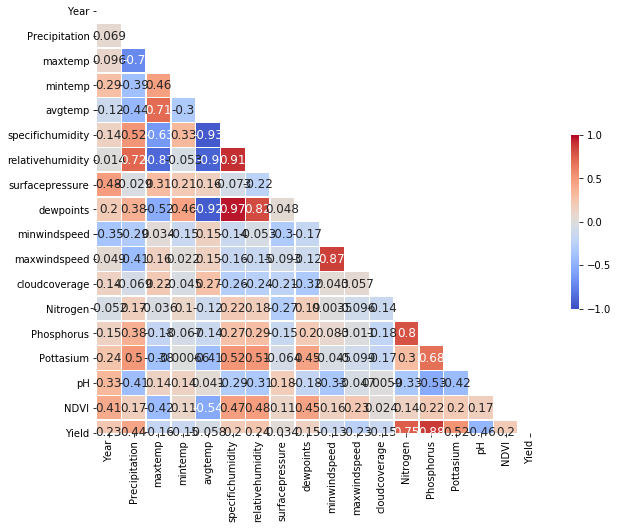

In [9]:
f, ax = plt.subplots(figsize=(10, 8)) 
heatmap = sns.heatmap(corr_matrix, mask = mask,square = True,linewidths = .5, cmap = 'coolwarm', cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]},vmin = -1, vmax = 1,annot = True,annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [259]:
#final=final.drop(['maxtemp','mintemp', 'avgtemp','pH','cloudcoverage','maxwindspeed','minwindspeed'],axis=1)

In [260]:
final.shape

(21, 18)

In [261]:
final1=final.iloc[:,:].values

In [262]:
final1

array([[ 1.99900000e+03,  9.00360000e+02,  3.22700000e+01,
         1.91400000e+01,  1.31300000e+01,  1.16370000e-02,
         5.50000000e+01,  9.40200000e+01,  1.39900000e+01,
         2.16000000e+00,  5.23000000e+00,  5.50000000e-01,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         2.00000000e+00,  3.69000000e-01,  1.05730000e+02],
       [ 2.00000000e+03,  6.00340000e+02,  3.29300000e+01,
         1.88700000e+01,  1.40600000e+01,  1.09410000e-02,
         5.06000000e+01,  9.39800000e+01,  1.24600000e+01,
         2.58000000e+00,  5.96000000e+00,  5.60000000e-01,
        -1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         2.00000000e+00,  3.55333333e-01,  9.14900000e+01],
       [ 2.00100000e+03,  5.47980000e+02,  3.27900000e+01,
         1.91700000e+01,  1.36200000e+01,  1.13910000e-02,
         5.31500000e+01,  9.40300000e+01,  1.35900000e+01,
         2.71000000e+00,  6.20000000e+00,  5.60000000e-01,
         0.00000000e+00,  1.00000000e+00,  1.00000000e

In [263]:
X=final1[:,:-1]
y=final1[:,-1]

In [264]:
X

array([[ 1.99900000e+03,  9.00360000e+02,  3.22700000e+01,
         1.91400000e+01,  1.31300000e+01,  1.16370000e-02,
         5.50000000e+01,  9.40200000e+01,  1.39900000e+01,
         2.16000000e+00,  5.23000000e+00,  5.50000000e-01,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         2.00000000e+00,  3.69000000e-01],
       [ 2.00000000e+03,  6.00340000e+02,  3.29300000e+01,
         1.88700000e+01,  1.40600000e+01,  1.09410000e-02,
         5.06000000e+01,  9.39800000e+01,  1.24600000e+01,
         2.58000000e+00,  5.96000000e+00,  5.60000000e-01,
        -1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         2.00000000e+00,  3.55333333e-01],
       [ 2.00100000e+03,  5.47980000e+02,  3.27900000e+01,
         1.91700000e+01,  1.36200000e+01,  1.13910000e-02,
         5.31500000e+01,  9.40300000e+01,  1.35900000e+01,
         2.71000000e+00,  6.20000000e+00,  5.60000000e-01,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         2.00000000e+00,  4.0

In [265]:
y

array([105.73,  91.49,  94.62,  93.05,  67.29,  80.83,  88.79,  83.68,
        84.47,  83.93,  89.45,  94.1 ,  98.62,  93.27, 100.59,  98.96,
        96.64, 124.38,  99.  ,  67.29,  99.  ])

In [266]:
X.shape

(21, 17)

In [267]:
y.shape

(21,)

In [268]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=101)

In [269]:
X_train,y_train=np.array(X_train),np.array(y_train)

    ### Decision Tree Regressor

In [270]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [271]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [272]:
dt_ypred= dt.predict(X_test)

In [273]:
print('Mean squared Error:',mean_squared_error(y_test,dt_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,dt_ypred)))
print('R2_Score:',r2_score(y_test,dt_ypred))

Mean squared Error: 18.626766666666708
Root Mean Squared Error: 4.315873801058912
R2_Score: 0.551246833260878


###Random Forest Regressor

In [274]:
from sklearn.ensemble import RandomForestRegressor

In [275]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train);

In [276]:
rf_pred=rf.predict(X_test)

In [277]:
print('Mean squared Error:',mean_squared_error(y_test,rf_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,rf_pred)))
print('R2_Score:',r2_score(y_test,dt_pred))

Mean squared Error: 3.5155264967003945
Root Mean Squared Error: 1.8749737322694402
R2_Score: 0.9153044821797884


# Random Forest Regressor is best for Yield prediction with accuracy of 91.5% 

In [278]:
yield2020=pd.read_csv("C:/Users/Abhishek Wagh/Desktop/MTech_Project/Sugarcane/Phase3/csv/2020prediction.csv")

In [279]:
yield2020=yield2020.iloc[:,:].values

In [280]:
yield2020

array([[ 2.02000000e+03,  7.45340000e+02,  3.27565278e+01,
         1.93041667e+01,  1.35251191e+01,  1.13656250e-02,
         5.05465100e+01,  9.40862964e+01,  1.34754762e+01,
         2.45597222e+00,  5.95358333e+00,  5.57666667e-01,
        -1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         2.00000000e+00,  4.20000000e-01]])

In [281]:
yield2020_pred=[]

In [282]:
yield2020_pred=kn.predict(yield2020)

In [283]:
yield2020_pred

array([94.54625])

# The sugarcane yield for year 2020 is 94.54625 tonnes/hectres.